### Importing libraries

In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing

### Training Image Preprocessing

In [101]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)
    

Found 2400 files belonging to 3 classes.


### Validation Image Preprocessing

In [37]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)
    

Found 2400 files belonging to 3 classes.


In [38]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [39]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[51.    61.    61.25 ]
   [67.25  66.25  73.5  ]
   [64.375 62.375 63.375]
   ...
   [42.    47.    43.   ]
   [48.    42.    46.   ]
   [48.    49.    44.   ]]

  [[50.375 59.    58.125]
   [60.125 61.125 63.125]
   [66.875 66.    64.   ]
   ...
   [45.    44.75  45.125]
   [49.625 45.    50.875]
   [43.625 47.625 46.875]]

  [[49.    53.    55.75 ]
   [54.125 58.125 57.125]
   [61.    61.    61.   ]
   ...
   [48.    46.    49.   ]
   [57.125 55.125 58.125]
   [42.125 46.125 47.125]]

  ...

  [[79.75  81.75  79.   ]
   [82.875 82.875 80.875]
   [95.    95.    87.   ]
   ...
   [52.75  53.75  57.75 ]
   [53.125 54.125 56.125]
   [52.125 54.125 53.125]]

  [[72.375 73.25  77.   ]
   [80.125 81.    83.   ]
   [84.75  86.625 81.5  ]
   ...
   [49.375 53.    54.375]
   [53.125 54.125 57.875]
   [53.75  53.    57.625]]

  [[62.5   64.75  69.75 ]
   [64.375 67.375 74.375]
   [64.25  68.875 71.875]
   ...
   [47.    51.625 48.75 ]
   [53.625 54.625 59.625]
   [53.375 51.375 63

### Building Model

In [40]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer, Dropout
from tensorflow.keras.models import Sequential
from keras.backend import clear_session
clear_session()

In [41]:
model = Sequential()

In [42]:

# Add an InputLayer to define the input shape
model.add(InputLayer(input_shape=(128, 128, 3)))

# Add Conv2D and other layers
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=3, activation='softmax'))  # Ensure the output layer has 3 units for your classes


### Compiling Model

In [43]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                    

### Model training

In [66]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 30)

Epoch 1/30
75/75 [==============================] - 233s 3s/step - loss: 0.1859 - accuracy: 0.9229 - val_loss: 0.1426 - val_accuracy: 0.9396
Epoch 2/30
75/75 [==============================] - 233s 3s/step - loss: 0.1604 - accuracy: 0.9304 - val_loss: 0.1145 - val_accuracy: 0.9542
Epoch 3/30
75/75 [==============================] - 231s 3s/step - loss: 0.1577 - accuracy: 0.9342 - val_loss: 0.1367 - val_accuracy: 0.9454
Epoch 4/30
75/75 [==============================] - 231s 3s/step - loss: 0.1760 - accuracy: 0.9212 - val_loss: 0.1114 - val_accuracy: 0.9583
Epoch 5/30
75/75 [==============================] - 235s 3s/step - loss: 0.1331 - accuracy: 0.9458 - val_loss: 0.1279 - val_accuracy: 0.9421
Epoch 6/30
75/75 [==============================] - 230s 3s/step - loss: 0.1195 - accuracy: 0.9508 - val_loss: 0.1150 - val_accuracy: 0.9471
Epoch 7/30
75/75 [==============================] - 230s 3s/step - loss: 0.0982 - accuracy: 0.9600 - val_loss: 0.0858 - val_accuracy: 0.9646
Epoch 8/30
75

### Model Evaluation

In [67]:
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

75/75 [==============================] - 36s 478ms/step - loss: 0.0038 - accuracy: 0.9983


In [68]:
print(train_loss,train_acc)

0.0038080739323049784 0.9983333349227905


In [69]:
# Model Evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

75/75 [==============================] - 36s 479ms/step - loss: 0.0038 - accuracy: 0.9983


In [70]:
print(val_loss,val_acc)

0.0038080736994743347 0.9983333349227905


### Saving Model

In [71]:
model.save("trained_model.keras")

In [72]:
# Recording Training History in json
import json
with open ("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

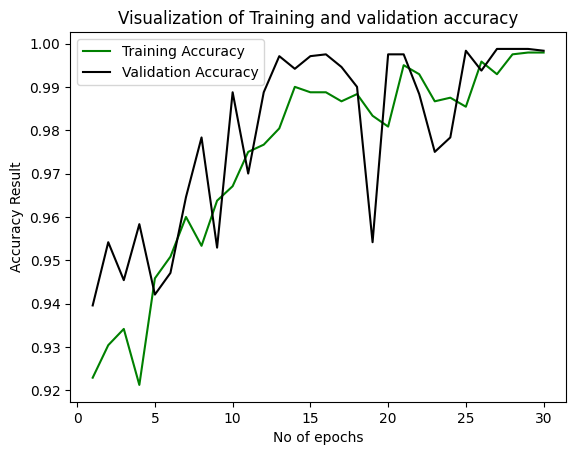

In [90]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'], color = 'green', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'black', label = 'Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Training and validation accuracy")
plt.legend()
plt.show()

### Loss Visualization

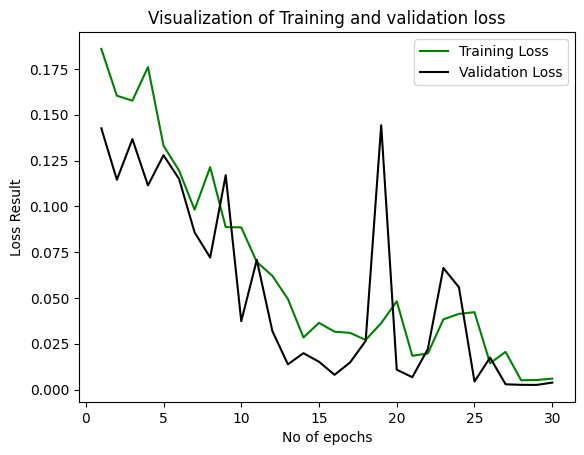

In [89]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['loss'], color = 'green', label = 'Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color = 'black', label = 'Validation Loss')
plt.xlabel("No of epochs")
plt.ylabel("Loss Result")
plt.title("Visualization of Training and validation loss")
plt.legend()
plt.show()

### Other metrics for model evaluation

In [76]:
class_name = validation_set.class_names
class_name

['Reject', 'Ripe', 'Unripe']

In [77]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = False,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)
    

Found 2400 files belonging to 3 classes.


In [78]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

75/75 [==============================] - 36s 473ms/step


(array([[9.99891341e-01, 1.07693144e-04, 9.23246546e-07],
        [9.99902189e-01, 9.72244161e-05, 5.29480872e-07],
        [9.99993026e-01, 6.94966548e-06, 8.15395484e-09],
        ...,
        [3.36144512e-09, 4.13508467e-19, 9.99999940e-01],
        [1.36715741e-07, 6.41624228e-16, 9.99999821e-01],
        [1.23739099e-07, 6.25299754e-15, 9.99999821e-01]], dtype=float32),
 (2400, 3))

In [79]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(2400,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2])>

In [80]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(2400, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [81]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(2400,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2])>

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

              precision    recall  f1-score   support

      Reject       1.00      1.00      1.00       800
        Ripe       1.00      1.00      1.00       800
      Unripe       1.00      1.00      1.00       800

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [86]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[798,   2,   0],
       [  2, 798,   0],
       [  0,   0, 800]])

### Confusion Martix Visualization

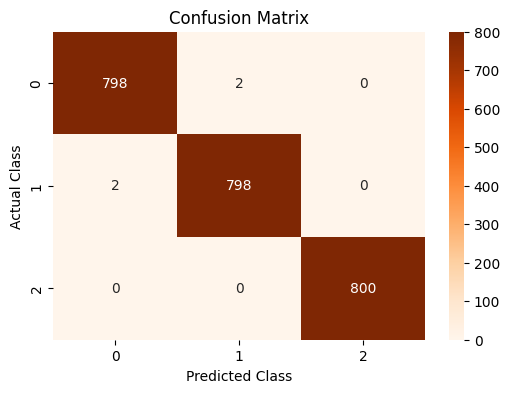

In [104]:
plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges') 
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()
